In [1]:
import pandas as pd

In [16]:
votes = pd.read_csv('out/votes.csv')
organes = (pd.read_csv('out/organes.csv'))

In [3]:
total = (
    votes
    .groupby('acteurRef')
    .agg({
        'scrutin': 'count'
    })
    .sort_values('scrutin', ascending = False)
)

total

,scrutin
acteurRef,
PA795934,1190
PA717379,1184
PA719608,1125
PA721710,1123
PA721482,1102
...,...
PA720960,61
PA2952,38
PA695100,38


In [4]:
loyautes = (
    votes
    .assign(
        divergence_groupe = lambda df: df.position != df.groupe_majorite
    )
    .groupby('acteurRef')
    .agg({
        'divergence_groupe': 'sum'
    })
    .join(total)
    .assign(
        loyaute = lambda df: df.divergence_groupe / df.scrutin
    )
    .sort_values('loyaute')
)

loyautes

,divergence_groupe,scrutin,loyaute
acteurRef,,,
PA721024,0,711,0.000000
PA588884,0,235,0.000000
PA794886,0,493,0.000000
PA606639,0,178,0.000000
PA795950,0,802,0.000000
...,...,...,...
PA718850,74,360,0.205556
PA605069,97,398,0.243719
PA942,106,386,0.274611


In [5]:
loyautes.to_csv('out/loyautes.csv')

loyaute    Axes(0.125,0.11;0.775x0.77)
dtype: object

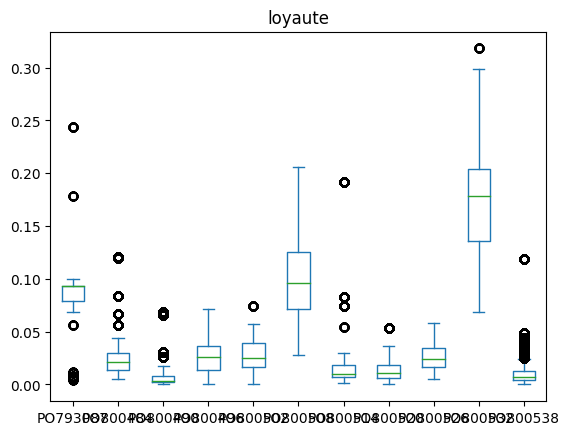

In [6]:
(
    loyautes
    .join(
        votes.set_index('acteurRef')[['organe']]
    )
    .reset_index()
    [['loyaute', 'organe']]
    .plot
    .box(
        by="organe",
        #ylim=[0,1]
    )
)

In [7]:
organes = (pd.read_csv('out/organes.csv'))

In [8]:
nupes = (
    organes
    .query('libelle.str.contains("NUPES") or libelle.str.contains("France insoumise")')
)

nupes

,@xmlns,@xmlns:xsi,@xsi:type,uid,codeType,libelle,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
133,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800490,GP,La France insoumise - Nouvelle Union Populaire...,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
262,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800496,GP,Socialistes et apparentés (membre de l’intergr...,du groupe Socialistes et apparentés (membre de...,SOC,SOC,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,6.0,#DF84B5
291,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800526,GP,Écologiste - NUPES,du groupe Écologiste - NUPES,Ecolo - NUPES,ECOLO,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79
598,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800502,GP,Gauche démocrate et républicaine - NUPES,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,9.0,#991414


loyaute    Axes(0.125,0.11;0.775x0.77)
dtype: object

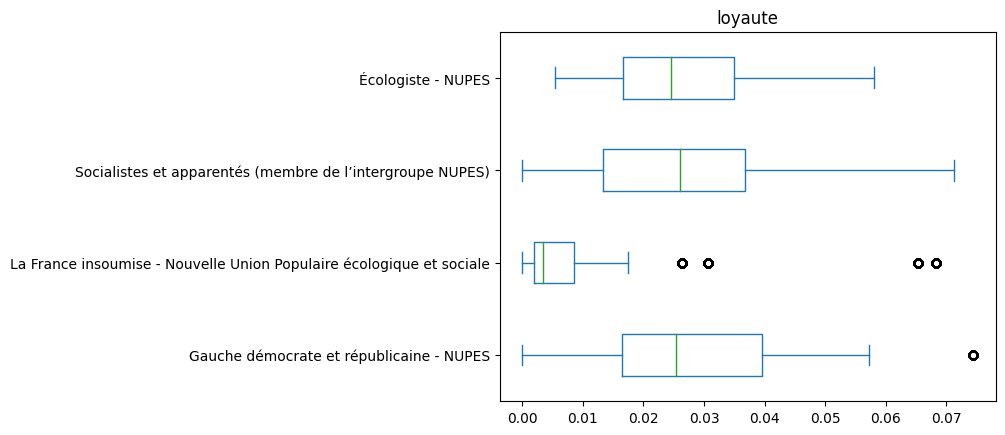

In [19]:
(
    loyautes
    .join(
        votes.set_index('acteurRef')[['organe']]
    )
    .reset_index()
    [['loyaute', 'organe']]
    .query('organe.isin(@nupes.uid)')
    .assign(
        organe = lambda df: df.join(nupes.set_index('uid'), on='organe')[['libelle']]
    )
    .plot
    .box(
        by="organe",
        vert=False
    )
)

In [24]:
(
    loyautes
    .join(
        votes.set_index('acteurRef')[['organe']]
    )
    .reset_index()
    [['loyaute', 'organe']]
    .query('organe.isin(@nupes.uid)')
    .assign(
        organe = lambda df: df.join(nupes.set_index('uid'), on='organe')[['libelle']]
    )
    .groupby('organe')
    .mean()
    .rsub(1)
)

,loyaute
organe,
Gauche démocrate et républicaine - NUPES,0.971067
La France insoumise - Nouvelle Union Populaire écologique et sociale,0.993172
Socialistes et apparentés (membre de l’intergroupe NUPES),0.972289
Écologiste - NUPES,0.973204


In [31]:
(
    loyautes
    .join(
        votes.set_index('acteurRef')[['organe']]
    )
    .reset_index()
    [['loyaute', 'organe']]
    #.query('organe.isin(@nupes.uid)')
    .assign(
        organe = lambda df: df.join(organes.set_index('uid'), on='organe')[['libelle']]
    )
    .groupby('organe')
    .mean()
    .rsub(1)
)

,loyaute
organe,
Démocrate (MoDem et Indépendants),0.974305
Gauche démocrate et républicaine - NUPES,0.971067
Horizons et apparentés,0.979560
La France insoumise - Nouvelle Union Populaire écologique et sociale,0.993172
Les Républicains,0.899639
"Libertés, Indépendants, Outre-mer et Territoires",0.820079
Non inscrit,0.911016
Rassemblement National,0.986666
Renaissance,0.990600


In [39]:
alignements = (
    votes
    .query('organe.isin(@nupes.uid)')
    .groupby(['scrutin', 'organe'])
    .agg({
        'groupe_majorite': 'first'
    })
    .reset_index()
    .assign(
        organe = lambda df: df.join(nupes.set_index('uid'), on='organe')[['libelle']]
    )
    .pivot_table(
        index="scrutin",
        columns="organe",
        values="groupe_majorite",
        aggfunc= lambda x: x
    )
    .assign(
        alignement= lambda df: df.eq(df.iloc[:, 0], axis=0).all(1)
    )
    #.join(votes.set_index('scrutin')[['date']].drop_duplicates())
    #.query('~alignement')
)

alignements

organe,Gauche démocrate et républicaine - NUPES,La France insoumise - Nouvelle Union Populaire écologique et sociale,Socialistes et apparentés (membre de l’intergroupe NUPES),Écologiste - NUPES,alignement
scrutin,,,,,
VTANR5L16V1,pour,pour,pour,pour,True
VTANR5L16V10,contre,abstention,contre,contre,False
VTANR5L16V100,pour,pour,pour,pour,True
VTANR5L16V1000,pour,pour,pour,pour,True
VTANR5L16V1001,pour,pour,pour,pour,True
...,...,...,...,...,...
VTANR5L16V995,pour,pour,pour,pour,True
VTANR5L16V996,pour,pour,pour,pour,True
VTANR5L16V997,pour,pour,pour,pour,True


In [40]:
alignements.to_csv('out/alignements-nupes.csv')

In [41]:
(
    alignements
    .query('~alignement')
    #.to_csv('out/alignement-false.csv')
)

organe,Gauche démocrate et républicaine - NUPES,La France insoumise - Nouvelle Union Populaire écologique et sociale,Socialistes et apparentés (membre de l’intergroupe NUPES),Écologiste - NUPES,alignement
scrutin,,,,,
VTANR5L16V10,contre,abstention,contre,contre,False
VTANR5L16V1007,NaN,contre,NaN,abstention,False
VTANR5L16V1013,pour,abstention,pour,pour,False
VTANR5L16V1018,pour,pour,pour,abstention,False
VTANR5L16V1020,NaN,abstention,NaN,abstention,False
...,...,...,...,...,...
VTANR5L16V970,abstention,abstention,contre,abstention,False
VTANR5L16V977,pour,pour,abstention,pour,False
VTANR5L16V980,abstention,abstention,NaN,NaN,False


In [42]:
scrutins = pd.read_csv('out/scrutins.csv')

In [45]:
alignements_complet = (
    alignements
    .join(scrutins.set_index('uid'))
    .assign(
        motion_censure = lambda df: df.objet.str.contains('motion de censure')
    )
    #.query("motion_censure")
    .sort_values('date')
)

alignements_complet

,Gauche démocrate et républicaine - NUPES,La France insoumise - Nouvelle Union Populaire écologique et sociale,Socialistes et apparentés (membre de l’intergroupe NUPES),Écologiste - NUPES,alignement,objet,type,date,motion_censure
scrutin,,,,,,,,,
VTANR5L16V1,pour,pour,pour,pour,True,la motion de censure déposée en application de...,scrutin public solennel,2022-07-11,True
VTANR5L16V2,pour,pour,pour,pour,True,"la motion de rejet préalable, déposée par Mme ...",scrutin public ordinaire,2022-07-11,False
VTANR5L16V5,pour,pour,contre,pour,False,l'amendement de suppression n° 15 de M. Di Fil...,scrutin public ordinaire,2022-07-12,False
VTANR5L16V4,contre,contre,pour,contre,False,l'article premier du projet de loi maintenant ...,scrutin public ordinaire,2022-07-12,False
VTANR5L16V13,contre,contre,abstention,contre,False,l'article 2 du projet de loi maintenant provis...,scrutin public ordinaire,2022-07-12,False
...,...,...,...,...,...,...,...,...,...
VTANR5L16V1489,NaN,pour,contre,pour,False,l'amendement n° 3 de Mme Maximi à l'article un...,scrutin public ordinaire,2023-05-10,False
VTANR5L16V1495,contre,contre,pour,pour,False,l'article unique de la proposition de loi visa...,scrutin public ordinaire,2023-05-10,False
VTANR5L16V1502,NaN,contre,NaN,pour,False,l'amendement n° 20 (rect.) du Gouvernement et ...,scrutin public ordinaire,2023-05-11,False


In [46]:
alignements_complet.to_csv('out/alignements.csv')

In [56]:
(alignements_complet
.assign(
    mois = lambda df: pd.to_datetime(df.date).dt.to_period('m')
)
.groupby('mois')
[['alignement']]
.size()
)

mois
2022-07    183
2022-08      8
2022-10    300
2022-11    159
2022-12    169
2023-01     83
2023-02    191
2023-03    257
2023-04     92
2023-05     49
Freq: M, dtype: int64

<Axes: xlabel='mois'>

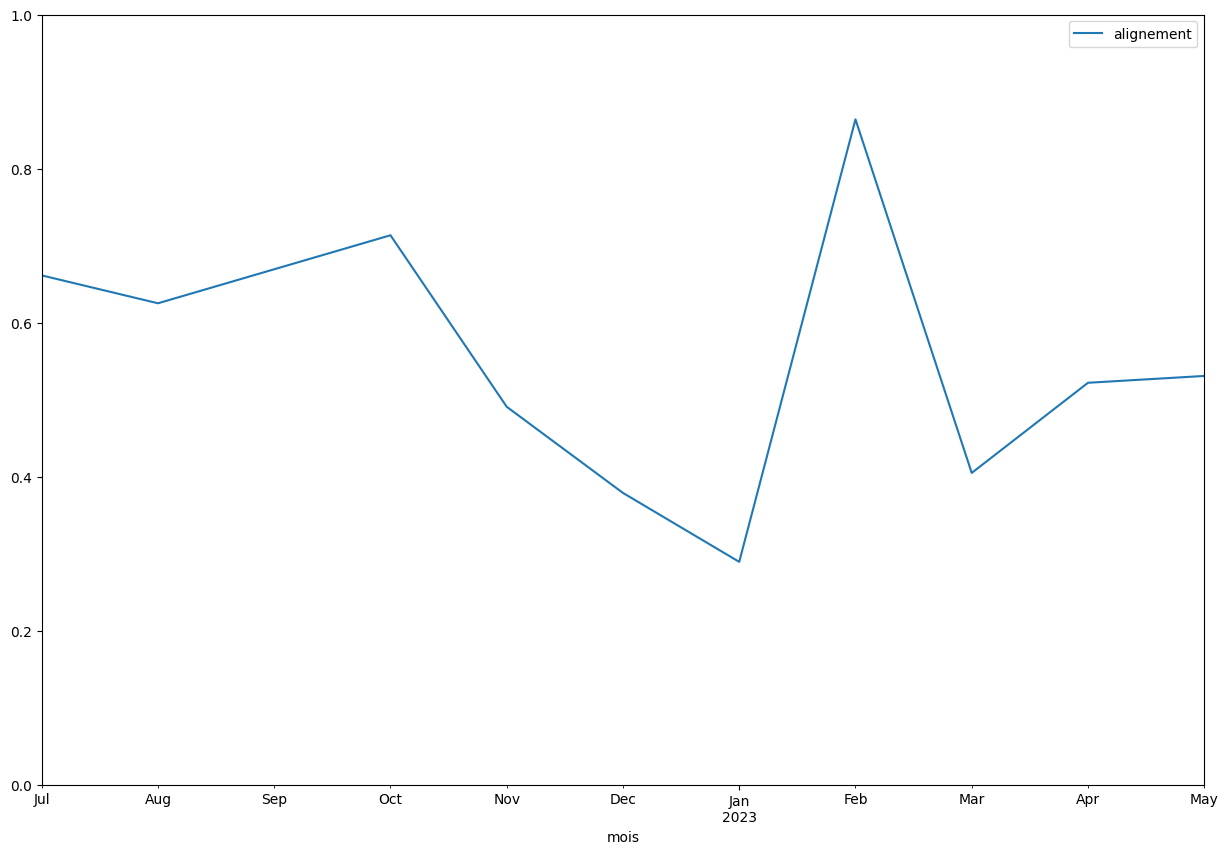

In [69]:
(
    alignements_complet
    .assign(
        mois = lambda df: pd.to_datetime(df.date).dt.to_period('m')
    )
    .groupby('mois')
    [['alignement']]
    .sum()
    .div(
            alignements_complet
            .assign(
                mois = lambda df: pd.to_datetime(df.date).dt.to_period('m')
            )
            .groupby('mois')
            [['alignement']]
            .size(),
        axis = 0
    )
    .plot
    .line(
        ylim=[0,1],
        figsize=(15,10)
    )
)

In [63]:
alignements_all = (
    votes
    .query('organe.isin(@nupes.uid)')
    .groupby(['scrutin', 'organe'])
    .agg({
        'groupe_majorite': 'first'
    })
    .reset_index()
    .assign(
        organe = lambda df: df.join(nupes.set_index('uid'), on='organe')[['libelle']]
    )
    .pivot_table(
        index="scrutin",
        columns="organe",
        values="groupe_majorite",
        aggfunc= lambda x: x
    )
    .pipe(
        lambda df: df.eq(df.iloc[:, 0], axis=0)
    )
    #.join(votes.set_index('scrutin')[['date']].drop_duplicates())
    #.query('~alignement')
)

alignements_all

organe,Gauche démocrate et républicaine - NUPES,La France insoumise - Nouvelle Union Populaire écologique et sociale,Socialistes et apparentés (membre de l’intergroupe NUPES),Écologiste - NUPES
scrutin,,,,
VTANR5L16V1,True,True,True,True
VTANR5L16V10,True,False,True,True
VTANR5L16V100,True,True,True,True
VTANR5L16V1000,True,True,True,True
VTANR5L16V1001,True,True,True,True
...,...,...,...,...
VTANR5L16V995,True,True,True,True
VTANR5L16V996,True,True,True,True
VTANR5L16V997,True,True,True,True


<Axes: xlabel='date'>

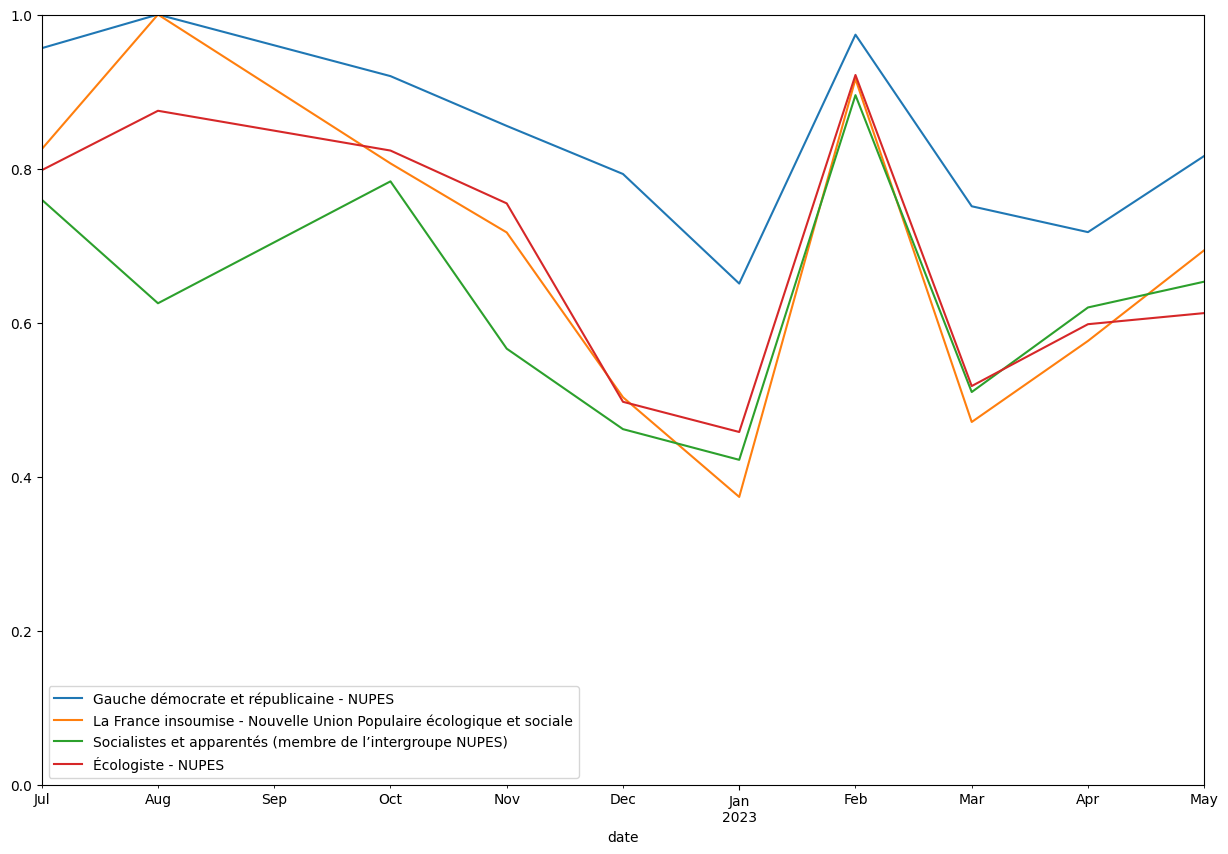

In [71]:
(
    alignements_all
    .join(scrutins.set_index('uid')[['date']])
    .sort_values('date')
    .assign(
        date = lambda df: pd.to_datetime(df.date).dt.to_period('m')
    )
    .groupby('date')
    .sum()
    .div(
            alignements_complet
            .assign(
                mois = lambda df: pd.to_datetime(df.date).dt.to_period('m')
            )
            .groupby('mois')
            [['alignement']]
            .size(),
        axis = 0
    )
    .plot
    .line(
        ylim=[0,1],
        figsize=(15,10)
    )
)